In [54]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def sigmoid (R):
        sigm = 1/(1+np.exp(-R))
        return sigm
        #output of SIGMOID function
        #R = np.clip(R, -500, 500) 
        #return 1 / (1 + np.exp(-R))

def add_bias (X):
     X = np.column_stack((np.ones(X.shape[0]), X))
     return X

class LogReg:
    def __init__ (self, lr=0.001, epochs=1000):
        self.w = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y): #Line search method
        
        y = y.values.reshape(-1, 1)
        X_n = add_bias(X)
        #X_n = np.nan_to_num(X_n)
        self.w = np.zeros((X_n.shape[1], 1))
        print("Есть ли NaN в X?", np.isnan(X_n).any())
        print("Есть ли бесконечности в X?", np.isinf(X_n).any())
        
        
        print("Размер X:", X_n.shape)
        print("Размер w:", self.w.shape)
        for _ in range(self.epochs):
            #sizes of ypred, X, gradient problem here
            y_pred = sigmoid(X_n @ self.w)
            gradient = 1/len(y)*(X_n.T @ (y_pred - y)) #ypred, y should be same size / len(y) to y.shape[0] // in matrix dotproduct you need this rule - a,b * b,c = a,c (razmernosti)
            self.w -= self.lr * gradient

        

    def predict(self, X):
        X_n = add_bias(X)
        #return np.sign(sigmoid(X_n@self.w) - 1/2)
        probs = sigmoid(X_n @ self.w)
        print(probs)
        res1 = []
        for i in range (len(probs)):
             if probs[i]>0.5:
                  res1.append(1)
             else:
                  res1.append(-1)
        
        res1 = np.array(res1)
        return res1
             
        #return (probs >= 0.5).astype(int)
    



In [56]:
df = pd.read_csv('Titanic-Dataset.csv')
#print(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
feature_columns = ['Survived', 'Fare', 'Age']  # Replace with actual feature column names
target_column = 'Sex'  # Replace with the actual target column name

X = df[feature_columns]  # Features
y = df[target_column]  # Target

X = (X - X.mean(axis=0)) / X.std(axis=0)
#X_n = np.nan_to_num(X_n)
#print("Есть ли NaN в X?", np.isnan(X_n).any())
#gfg = pd.DataFrame(GFG_dict)
mean_value = X['Age'].mean()

# Replace NaNs in column S2 with the
# mean of values in the same column
X['Age'].fillna(value=mean_value, inplace=True)

#X,y

C:\Users\User\AppData\Local\Temp\ipykernel_76276\2018224721.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(value=mean_value, inplace=True)


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

y = y.map({"male": 1, "female": -1})  # ✅ Простая замена


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((596, 3), (596,), (295, 3), (295,))

In [46]:
#y

In [47]:
print(y_train.dtype)
print(X_train.dtypes)


int64
Survived    float64
Fare        float64
Age         float64
dtype: object


In [66]:
obj1 = LogReg()
obj1.fit(X_train, y_train)
result1 = obj1.predict(X_test)



acc = 0
for elem in range (len(result1)):
    if result1[elem] == y_test[elem]:
        acc += 1
#print(acc)
accuracy = acc / len(result1)
print(accuracy)


#print(result1)


Есть ли NaN в X? False
Есть ли бесконечности в X? False
Размер X: (596, 4)
Размер w: (4, 1)
[[0.33688737]
 [0.55880701]
 [0.5467721 ]
 [0.30062038]
 [0.32173726]
 [0.29612414]
 [0.34137596]
 [0.53507047]
 [0.32599237]
 [0.3184874 ]
 [0.53812799]
 [0.57652772]
 [0.54729856]
 [0.55971877]
 [0.56338191]
 [0.30769196]
 [0.32855166]
 [0.34132839]
 [0.55216863]
 [0.55138325]
 [0.55179364]
 [0.33499606]
 [0.32926928]
 [0.5459112 ]
 [0.55454781]
 [0.52092604]
 [0.55867155]
 [0.33970154]
 [0.51335807]
 [0.56054913]
 [0.54553936]
 [0.33268649]
 [0.54383473]
 [0.55913015]
 [0.32803932]
 [0.55120765]
 [0.32302701]
 [0.34137596]
 [0.32788438]
 [0.55890238]
 [0.50437017]
 [0.55859163]
 [0.55880081]
 [0.55899842]
 [0.57358072]
 [0.52417137]
 [0.54536547]
 [0.54966509]
 [0.55235248]
 [0.52450728]
 [0.30731951]
 [0.31569418]
 [0.55855349]
 [0.25892939]
 [0.60238563]
 [0.28733319]
 [0.560052  ]
 [0.23232028]
 [0.33943927]
 [0.32925453]
 [0.54812285]
 [0.31584868]
 [0.32860246]
 [0.54699515]
 [0.55899842

In [9]:
y_test

709    1
439    1
840    1
720   -1
39    -1
      ..
715    1
525    1
381   -1
140   -1
173    1
Name: Sex, Length: 295, dtype: int64

In [51]:
def plot_decision_boundary(model, X, y, feature_indices=(0, 1)):
    import numpy as np
    import matplotlib.pyplot as plt

    # Берём только 2 выбранных признака
    x_idx, y_idx = feature_indices
    X_plot = X[:, [x_idx, y_idx]]

    # Строим сетку по этим двум признакам
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Создаём сетку точек и добавляем третий признак как 0 (или среднее значение)
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_full = np.zeros((grid.shape[0], 3))
    grid_full[:, x_idx] = grid[:, 0]
    grid_full[:, y_idx] = grid[:, 1]

    # Предсказания
    Z = obj1.predict(grid_full).reshape(xx.shape)

    # Отображение
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, x_idx], X[:, y_idx], c=y.ravel(), cmap="RdBu", edgecolor="k")
    plt.xlabel(f"Признак {x_idx + 1}")
    plt.ylabel(f"Признак {y_idx + 1}")
    plt.title("Решающая граница логистической регрессии")
    plt.show()


[[0.45662126]
 [0.4552653 ]
 [0.45391   ]
 ...
 [0.22292589]
 [0.2219804 ]
 [0.22103778]]


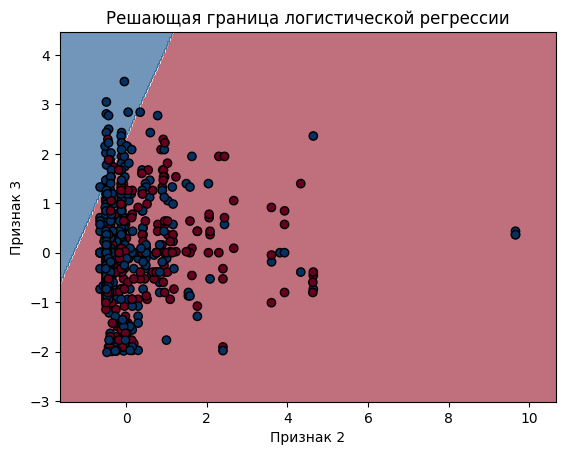

In [52]:
X_np = X.to_numpy()
y_np = y.to_numpy().reshape(-1, 1)

plot_decision_boundary(obj1, X_np, y_np, feature_indices=(1, 2))